## Name : Vajjah Srinivasa Taaran

Assignment 5:

    Take all the columns in mall_customers.csv
    
    gender age annual income spending score
    
    perform label encoding on gender
    
    train your data
    

# Data Preprocessing.
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.

## 1.import the necessary libraries"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.import the dataset

In [2]:
df = pd.read_csv("mall_customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.Handling null values

In [4]:
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
corr = df.corr()
corr

/var/folders/0g/xqmh0yz92jx_s8ljsv3x08wr0000gn/T/ipykernel_5542/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

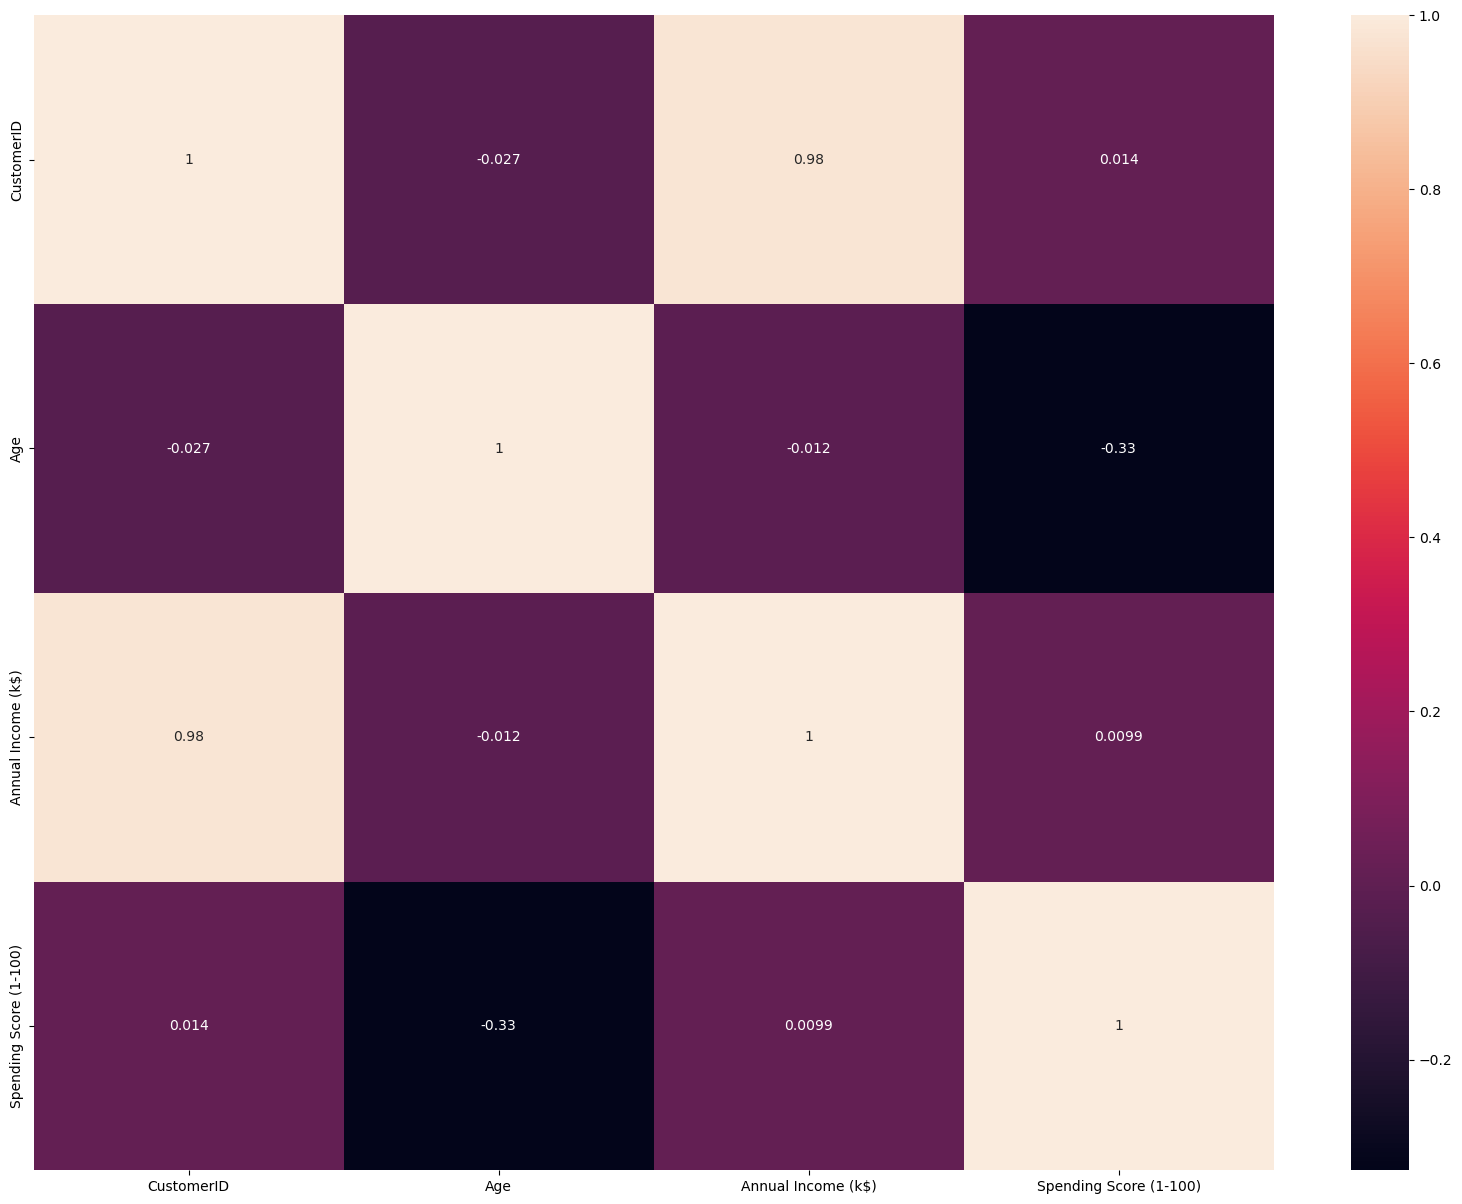

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

## 4.Outlier detection

<Axes: >

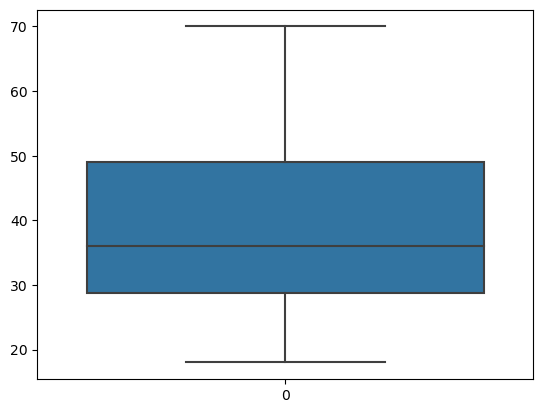

In [29]:
sns.boxplot(df.Age)

## 5.Seperate Dependent and independent variables

In [30]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
#datset.iloc[rows,column]
x=df['Spending Score (1-100)'] # Dependent
y=df.drop(columns=["Spending Score (1-100)"],axis=1)  # Independent

In [54]:
x

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [55]:
y

,CustomerID,Genre,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


## 6.Encoding 

### perform label encoding on gender

We use label encoder on Genre

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()

In [63]:
y["Genre"]=le.fit_transform(y["Genre"])

In [64]:
y["Genre"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int64

In [66]:
y["Genre"].value_counts()

0    112
1     88
Name: Genre, dtype: int64

In [67]:
y["Genre"].nunique()

2

In [68]:
y.head()

,CustomerID,Genre,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [76]:
x=pd.concat([x,y],axis=1)
x

,Spending Score (1-100),CustomerID,Genre,Age,Annual Income (k$),CustomerID,Genre,Age,Annual Income (k$)
0,39,1,1,19,15,1,1,19,15
1,81,2,1,21,15,2,1,21,15
2,6,3,0,20,16,3,0,20,16
3,77,4,0,23,16,4,0,23,16
4,40,5,0,31,17,5,0,31,17
...,...,...,...,...,...,...,...,...,...
195,79,196,0,35,120,196,0,35,120
196,28,197,0,45,126,197,0,45,126
197,74,198,1,32,126,198,1,32,126
198,18,199,1,32,137,199,1,32,137


## 7. Feature Scaling

In [77]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [78]:
x_Scaled=ms.fit_transform(x)

In [80]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [81]:
x_Scaled.head()

,Spending Score (1-100),CustomerID,Genre,Age,Annual Income (k$),CustomerID,Genre,Age,Annual Income (k$)
0,0.387755,0.000000,1.0,0.019231,0.000000,0.000000,1.0,0.019231,0.000000
1,0.816327,0.005025,1.0,0.057692,0.000000,0.005025,1.0,0.057692,0.000000
2,0.051020,0.010050,0.0,0.038462,0.008197,0.010050,0.0,0.038462,0.008197
3,0.775510,0.015075,0.0,0.096154,0.008197,0.015075,0.0,0.096154,0.008197
4,0.397959,0.020101,0.0,0.250000,0.016393,0.020101,0.0,0.250000,0.016393


## 8. Train your data

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,test_size =0.2,random_state =0)

In [83]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(160, 9) (40, 9) (160, 4) (40, 4)
